In [4]:
"""
    Here are several nonlinear regression models
"""

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# create a random dataset
np.random.seed(45)
m = 300
r=0.5
ruido = r*np.random.randn(m, 1)
x= 6 * np.random.rand(m, 1) -3
y= 0.5 * x**2 + x + 2 + ruido

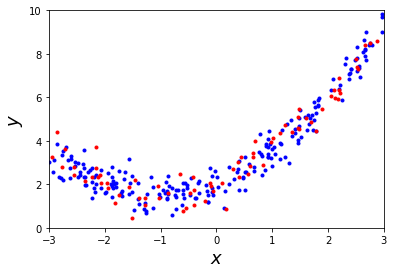

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

# plot the test and train datasets
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [6]:
def plotModelResults(x_new, y_pred):
    # plot the dataset and the model results
    plt.plot(x_new, y_pred, 'k-', linewidth=3)
    plt.plot(xtrain, ytrain, "b.")
    plt.plot(xtest, ytest, "r.")
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", fontsize=18)
    plt.axis([-3,3,0,10])
    plt.show()
    
    


Train:  0.9534733531647239
Test:  0.912993270559335


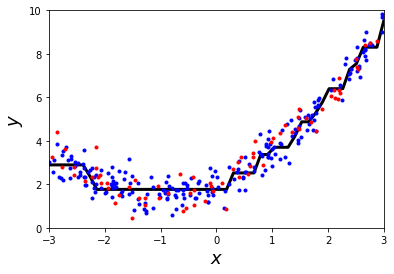

In [13]:
"""
The decision trees assign the value to the data to be predicted according to the mean of the threshold to which they belong.
The complexity of the model is determined by the depth of the tree. This depth is controlled by the 'max_depth' hyperparameter.
The greater the number of sheets, the greater the complexity of the model, that is, it will tend to over-train, and the lower 
the 'max_depth', the less complexity of the model.
"""
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3,3,50).reshape(-1,1)
y_pred = model.predict(x_new)

plotModelResults(x_new, y_pred)

Train:  0.941068054937823
Test:  0.9520141744630238


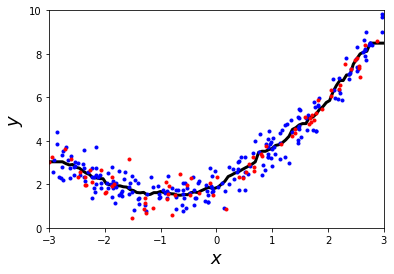

In [30]:
"""
Assign an average of the closest neighbors for each data to predict.

If we have only few neighbors for each data to predict, the
model will tend to be overtrained, and if we have much more neighbors, 
the model will be under-trained.
"""
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=15, weights = 'uniform')
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3,3,100).reshape(-1, 1)
y_pred = model.predict(x_new)

plotModelResults(x_new, y_pred)

Train:  0.9482807263559263
Test:  0.9336449687147492


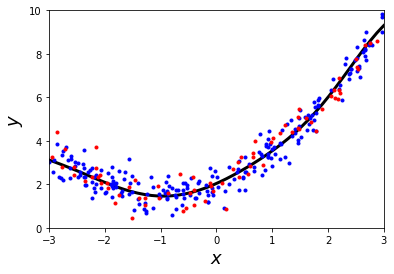

In [16]:
"""
Suport Vector Regressor

'epsilon' controls the margin that we give of tolerance to the regression line.

'C' is a regulation variable, if it's small, the model will tend to under-train, and
the other way around, if 'C' is very large it will tend to overtrain
"""

from sklearn.svm import SVR
model = SVR(gamma='scale', C=10, epsilon=0.5, kernel='rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3,3,50).reshape(-1,1)
y_pred = model.predict(x_new)

plotModelResults(x_new, y_pred)

Train:  0.949405054451362
Test:  0.9357248285303846


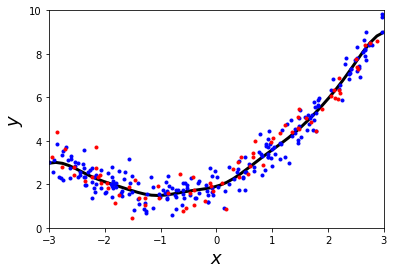

In [17]:
"""
'alpha' controls the regularization of the model, if it is close to 0 then it will not
regulate anything and will tend to overtrain, and if 'alpha' is bigger then more regularized 
the model will be, so it will tend to under-train
"""
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(alpha=0.1, kernel='rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3,3,50).reshape(-1,1)
y_pred = model.predict(x_new)

plotModelResults(x_new, y_pred)

Train:  0.9479563900026927
Test:  0.9310325735460712


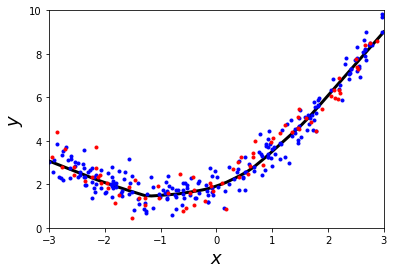

In [18]:
"""
MLP Neural Network

If the model has a high amount of hidden neurons, then the model will be more complex and willñ tend to overtrain
"""
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,20), 
                    solver='adam', activation='relu', batch_size=10)
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3,3,50).reshape(-1,1)
y_pred = model.predict(x_new)

plotModelResults(x_new, y_pred)